In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from models import pentzer2014pow as pentzer2014pow
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# Parameters
abbr = "H01"


In [3]:
preprocess(abbr, verbose=False)
powdf = pentzer2014pow.pentzer2014pow(abbr)


H01: 100%|██████████| 66/66 [00:00<00:00, 4018.06it/s]

H01 : Exported PENTZER2014POW CSV in data/runs/H01/models/H01_2023_04_14-10_44_17-TF-boreal01_pentzer2014pow.csv


In [4]:
print(powdf.columns.values)


['time' 'time_rel' 'vx' 'vy' 'vz' 'px' 'py' 'pz' 'theta' 'phi' 'wz' 'ax'
 'ay' 'az' 'qw' 'qx' 'qy' 'qz' 'cmd_v' 'cmd_w' 'wL' 'wR' 'voltage' 'V_L'
 'V_R' 'current_cpu' 'I_L' 'I_R' 'ax_corr' 'ay_corr' 'az_corr' 'v' 'a'
 'vL' 'vR' 'PE_L' 'PE_R' 'TL' 'TR' 'PM_L' 'PM_R' 'P_motion' 'P_total'
 'ICRx' 'ICRy' 'ICRyL' 'ICRyR' 'Bs' 'R' 'normal_force' 'dx_front'
 'dx_rear' 'dy_left' 'dy_right' 'd_fl' 'd_fr' 'd_rl' 'd_rr' 'dist_asym'
 'dist_sym' 'JS_asym' 'JS_sym' 'JG' 'm_sym' 'G_sym' 'sm_sym' 'sG_sym'
 'm_asym' 'G_asym' 'sm_asym' 'sG_asym' 'Ppredt_sym' 'Perrt_sym'
 'EWMAt_sym' 'estt_sym' 'Ppredc_sym' 'Perrc_sym' 'EWMAc_sym' 'estc_sym'
 'Ppredt_asym' 'Perrt_asym' 'EWMAt_asym' 'estt_asym' 'Ppredc_asym'
 'Perrc_asym' 'EWMAc_asym' 'estc_asym' 'energy_Wh' 'Epredt_sym_Wh'
 'Epredt_asym_Wh' 'Epredc_sym_Wh' 'Epredc_asym_Wh' 'pcerr_tsym'
 'pcerr_tasym' 'pcerr_csym' 'pcerr_casym']


(-10.0, 10.0)

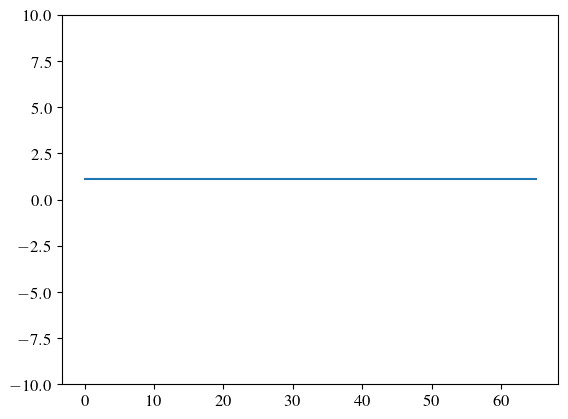

In [5]:
axlim = 10
fig, ax = plt.subplots()
(powdf.ICRyL - powdf.ICRyR).plot(ax=ax)
ax.set_ylim(bottom=-axlim, top=axlim)

In [6]:
mask = powdf.index >= 10

index = powdf.index[mask]
power = powdf.P_total[mask]

mu_asym = powdf.m_asym[mask]
G_asym = powdf.G_asym[mask]

mu_sym = powdf.m_sym[mask]
G_sym = powdf.G_sym[mask]


In [7]:
model_name = pentzer2014pow.__MODEL_NAME__.lower()
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename, subdir=model_name)
model_name = pentzer2014pow.__MODEL_NAME__.title()

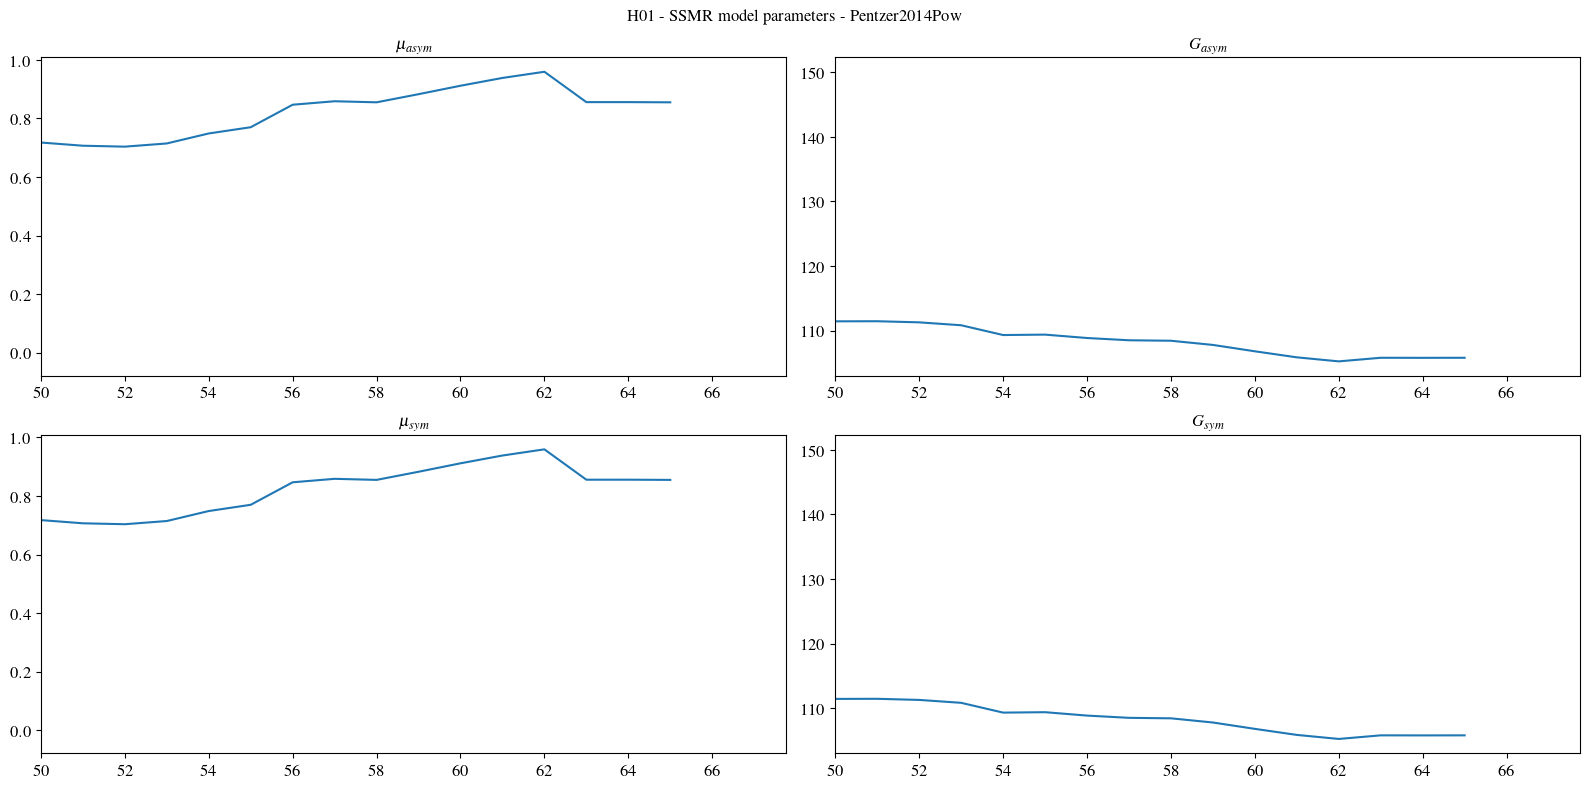

In [8]:
fig, subfigs = plt.subplots(ncols=2, nrows=2, figsize = (16,8))
cols = ("m_asym", "G_asym", "m_sym", "G_sym")

for col, ax in zip(cols, subfigs.reshape(-1)):
    powdf[mask][col].plot(ax=ax)
    if col.startswith("m_"):
        title_txt = f"\{col.replace('m_', 'mu_')}"
    else:
        title_txt = col
    title_txt = title_txt.replace("_asym", "_{{asym}}")
    title_txt = title_txt.replace("_sym", "_{{sym}}")

    ax.set_xlim(left=50)

    ax.set_title(f"${title_txt}$")

fig.suptitle(f"{abbr} - SSMR model parameters - {model_name}")
fig.tight_layout()
fig.savefig(figdir / f"{abbr}_parameters.jpg", bbox_inches="tight")


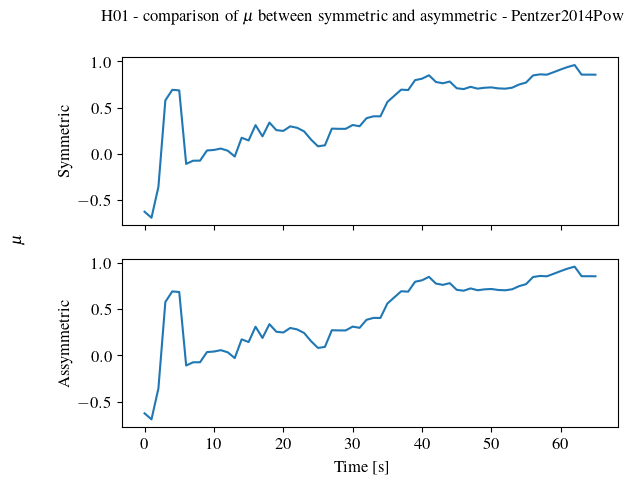

In [9]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
powdf.m_sym.plot(ax=ax1)
powdf.m_asym.plot(ax=ax2)
ax1.set_ylabel("Symmetric")
ax2.set_ylabel("Assymmetric")
fig.supylabel("$\mu$", x=-0.05)
fig.supxlabel("Time [s]")
fig.suptitle(f"{abbr} - comparison of $\mu$ between symmetric and asymmetric - {model_name}")

fig.savefig(figdir / f"{abbr}_m.jpg", bbox_inches="tight")

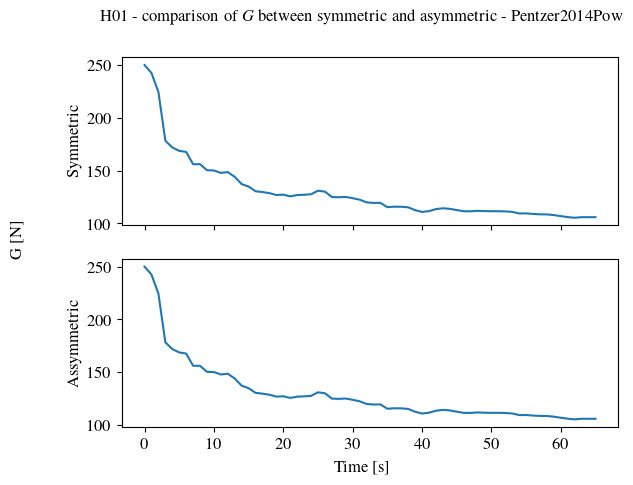

In [10]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
powdf.G_sym.plot(ax=ax1)
powdf.G_asym.plot(ax=ax2)
ax1.set_ylabel("Symmetric")
ax2.set_ylabel("Assymmetric")
fig.supylabel("G [N]", x=-0.05)
fig.supxlabel("Time [s]")
fig.suptitle(f"{abbr} - comparison of $G$ between symmetric and asymmetric - {model_name}")

fig.savefig(figdir / f"{abbr}_G.jpg", bbox_inches="tight")

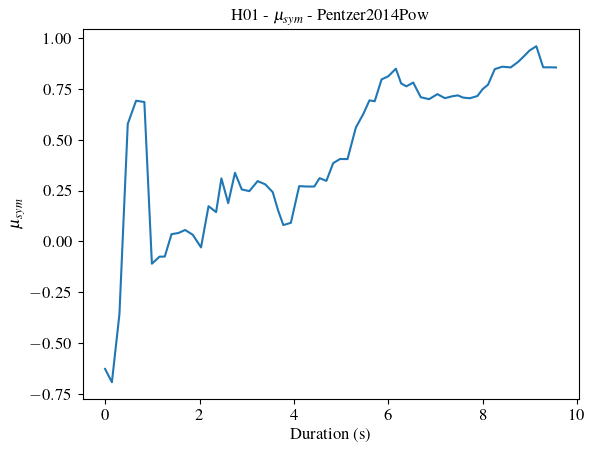

In [11]:
fig, ax = plt.subplots()
ax.plot(powdf.time_rel, powdf.m_sym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\mu_{sym}$", x=-0.05)
ax.set_title(f"{abbr} - $\mu_{{sym}}$ - {model_name}")

fig.savefig(figdir / f"{abbr}_m_sym.jpg", bbox_inches="tight")

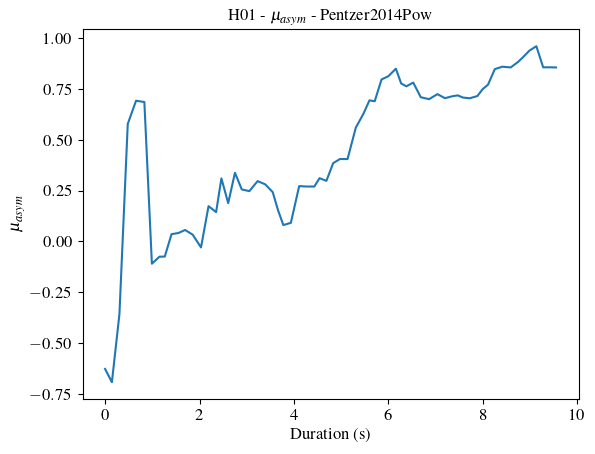

In [12]:
fig, ax = plt.subplots()
ax.plot(powdf.time_rel, powdf.m_asym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\mu_{asym}$", x=-0.05)
ax.set_title(f"{abbr} - $\mu_{{asym}}$ - {model_name}")

fig.savefig(figdir / f"{abbr}_m_asym.jpg", bbox_inches="tight")


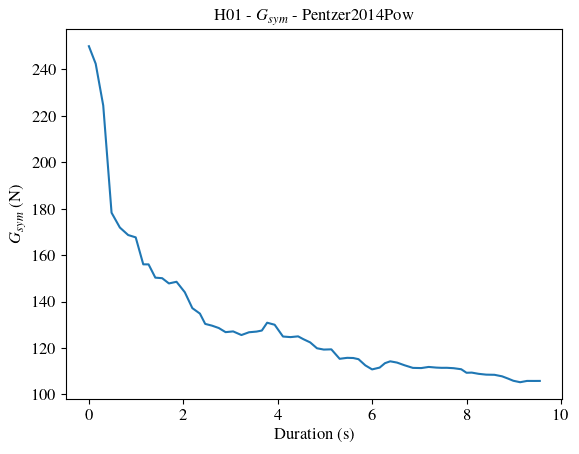

In [13]:
fig, ax = plt.subplots()
ax.plot(powdf.time_rel, powdf.G_sym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$G_{sym}$ (N)", x=-0.05)
ax.set_title(f"{abbr} - $G_{{sym}}$ - {model_name}")

fig.savefig(figdir / f"{abbr}_G_sym.jpg", bbox_inches="tight")

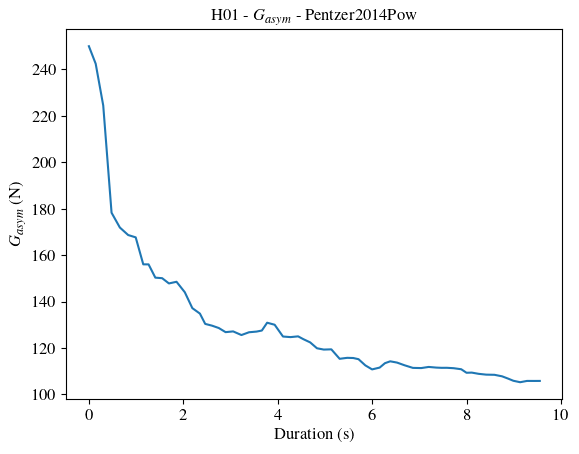

In [14]:
fig, ax = plt.subplots()
ax.plot(powdf.time_rel, powdf.G_asym)
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$G_{asym}$ (N)", x=-0.05)
ax.set_title(f"{abbr} - $G_{{asym}}$ - {model_name}")

fig.savefig(figdir / f"{abbr}_G_asym.jpg", bbox_inches="tight")

# DONE

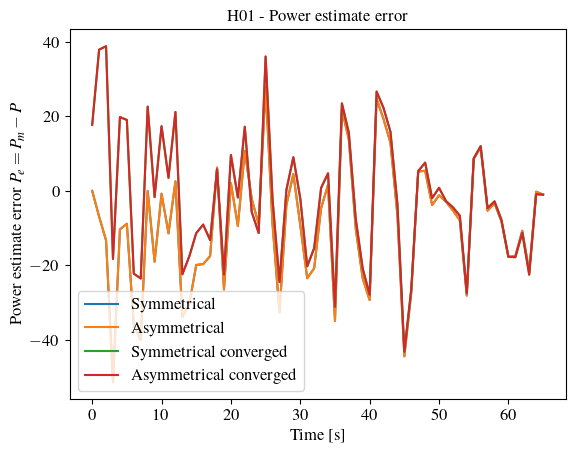

In [15]:
fig, ax = plt.subplots()
powdf.Perrt_sym.plot(ax=ax, label="Symmetrical")
powdf.Perrt_asym.plot(ax=ax, label="Asymmetrical")
powdf.Perrc_sym.plot(ax=ax, label="Symmetrical converged")
powdf.Perrc_asym.plot(ax=ax, label="Asymmetrical converged")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(figdir / f"{abbr}_Perror.jpg", bbox_inches="tight")

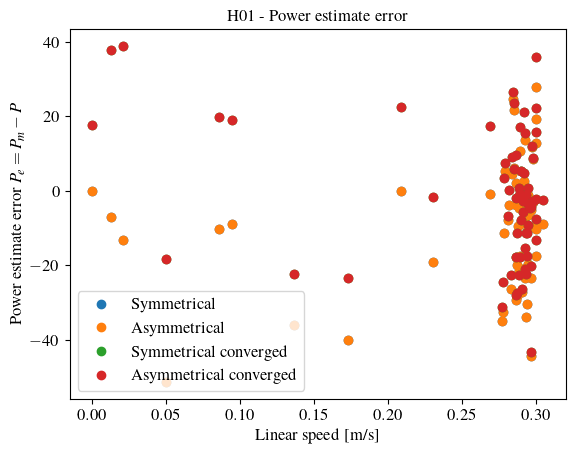

In [16]:
fig, ax = plt.subplots()
ax.plot(powdf.vx, powdf.Perrt_sym, "o", label="Symmetrical")
ax.plot(powdf.vx, powdf.Perrt_asym, "o", label="Asymmetrical")
ax.plot(powdf.vx, powdf.Perrc_sym, "o", label="Symmetrical converged")
ax.plot(powdf.vx, powdf.Perrc_asym, "o", label="Asymmetrical converged")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Linear speed [m/s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(figdir / f"{abbr}_Perror_vx.jpg", bbox_inches="tight")

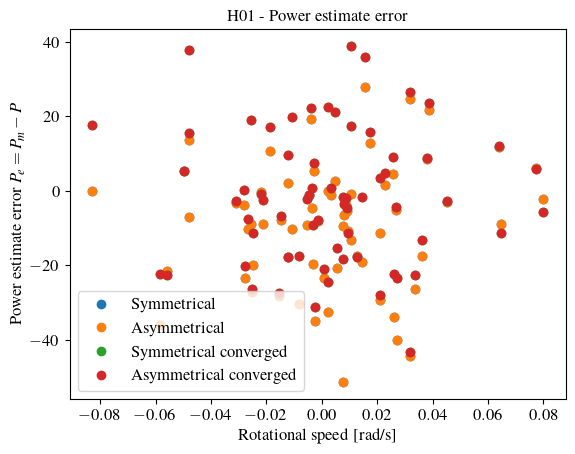

In [17]:
fig, ax = plt.subplots()
ax.plot(powdf.wz, powdf.Perrt_sym, "o", label="Symmetrical")
ax.plot(powdf.wz, powdf.Perrt_asym, "o", label="Asymmetrical")
ax.plot(powdf.wz, powdf.Perrc_sym, "o", label="Symmetrical converged")
ax.plot(powdf.wz, powdf.Perrc_asym, "o", label="Asymmetrical converged")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Rotational speed [rad/s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(figdir / f"{abbr}_Perror_wz.jpg", bbox_inches="tight")

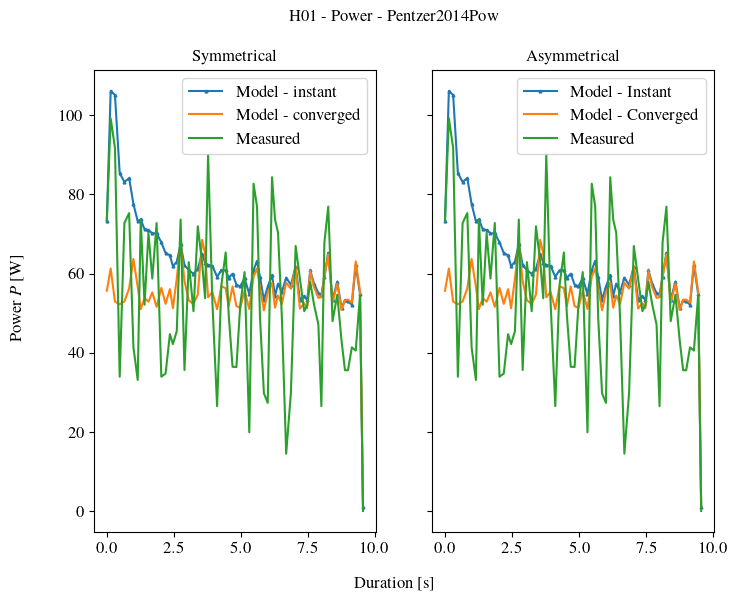

In [18]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(8, 6))
ax1.plot(powdf.time_rel, powdf.Ppredt_sym, label="Model - instant", marker="^", markersize=2)
ax1.plot(powdf.time_rel, powdf.Ppredc_sym, label="Model - converged")
ax1.plot(powdf.time_rel, powdf.P_motion, label="Measured")
ax1.legend()
ax1.set_title("Symmetrical")

ax2.plot(powdf.time_rel, powdf.Ppredt_asym, label="Model - Instant", marker="^", markersize=2)
ax2.plot(powdf.time_rel, powdf.Ppredc_asym, label="Model - Converged")
ax2.plot(powdf.time_rel, powdf.P_motion, label="Measured")
ax2.legend()
ax2.set_title("Asymmetrical")

fig.supylabel("Power $P$ [W]")
fig.supxlabel("Duration [s]")
fig.suptitle(f"{abbr} - Power - {model_name}")
fig.savefig(figdir / f"{abbr}_Power.jpg", bbox_inches="tight")

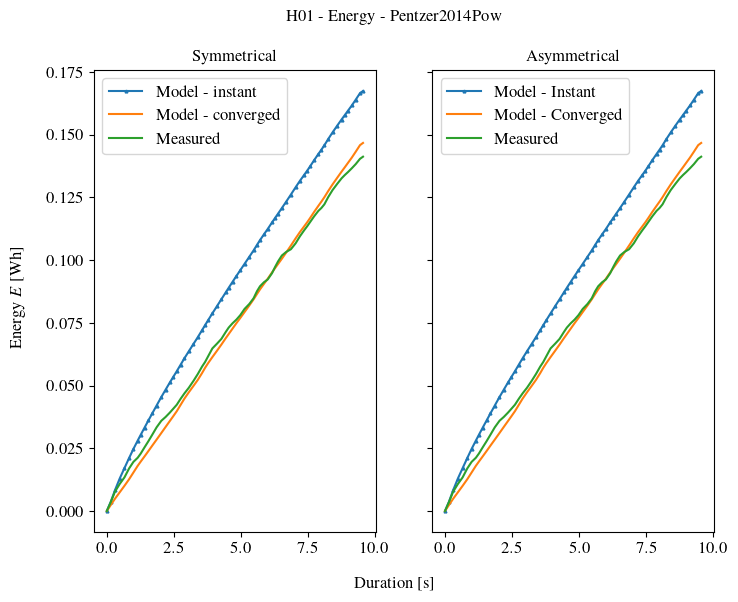

In [19]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(8, 6))
ax1.plot(powdf.time_rel, powdf.Epredt_sym_Wh, label="Model - instant", marker="^", markersize=2)
ax1.plot(powdf.time_rel, powdf.Epredc_sym_Wh, label="Model - converged")
ax1.plot(powdf.time_rel, powdf.energy_Wh, label="Measured")
ax1.legend()
ax1.set_title("Symmetrical")

ax2.plot(powdf.time_rel, powdf.Epredt_asym_Wh, label="Model - Instant", marker="^", markersize=2)
ax2.plot(powdf.time_rel, powdf.Epredc_asym_Wh, label="Model - Converged")
ax2.plot(powdf.time_rel, powdf.energy_Wh, label="Measured")
ax2.legend()
ax2.set_title("Asymmetrical")

fig.supylabel("Energy $E$ [Wh]")
fig.supxlabel("Duration [s]")
fig.suptitle(f"{abbr} - Energy - {model_name}")
fig.savefig(figdir / f"{abbr}_EnergyWh.jpg", bbox_inches="tight")

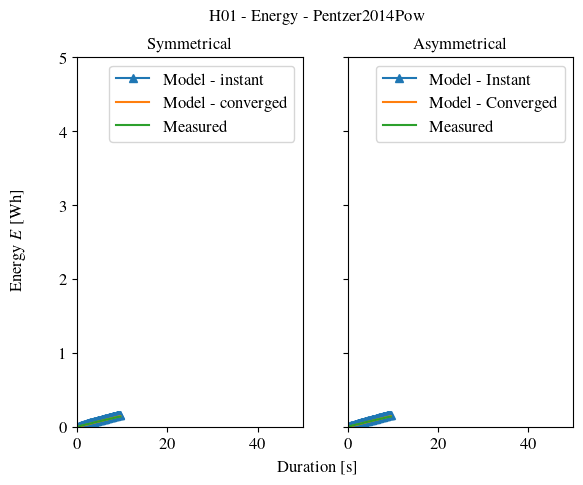

In [20]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, sharex=True)
ax1.plot(powdf.time_rel, powdf.Epredt_sym_Wh, label="Model - instant",marker="^")
ax1.plot(powdf.time_rel, powdf.Epredc_sym_Wh, label="Model - converged")
ax1.plot(powdf.time_rel, powdf.energy_Wh, label="Measured")
ax1.legend()
ax1.set_title("Symmetrical")

ax2.plot(powdf.time_rel, powdf.Epredt_asym_Wh, label="Model - Instant", marker="^")
ax2.plot(powdf.time_rel, powdf.Epredc_asym_Wh, label="Model - Converged")
ax2.plot(powdf.time_rel, powdf.energy_Wh, label="Measured")
ax2.legend()
ax2.set_title("Asymmetrical")

ax1.set_xlim(left=0, right=50)
ax1.set_ylim(bottom=0, top=5)

fig.supylabel("Energy $E$ [Wh]")
fig.supxlabel("Duration [s]")
fig.suptitle(f"{abbr} - Energy - {model_name}")
fig.savefig(figdir / f"{abbr}_EnergyWh_start.jpg", bbox_inches="tight")

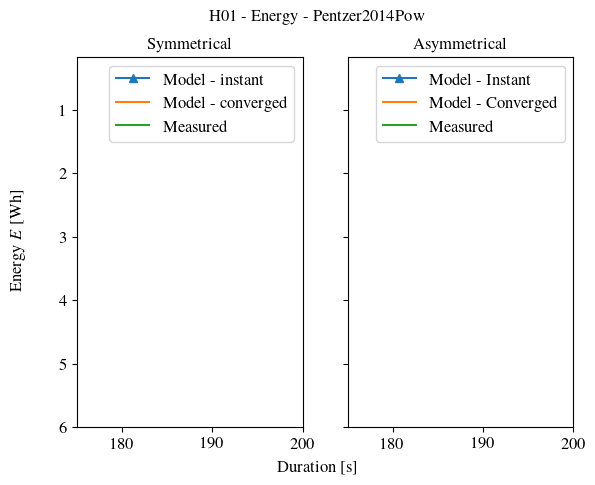

In [21]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, sharex=True)
ax1.plot(powdf.time_rel, powdf.Epredt_sym_Wh, label="Model - instant",marker="^")
ax1.plot(powdf.time_rel, powdf.Epredc_sym_Wh, label="Model - converged")
ax1.plot(powdf.time_rel, powdf.energy_Wh, label="Measured")
ax1.legend()
ax1.set_title("Symmetrical")

ax2.plot(powdf.time_rel, powdf.Epredt_asym_Wh, label="Model - Instant", marker="^")
ax2.plot(powdf.time_rel, powdf.Epredc_asym_Wh, label="Model - Converged")
ax2.plot(powdf.time_rel, powdf.energy_Wh, label="Measured")
ax2.legend()
ax2.set_title("Asymmetrical")

ax1.set_xlim(left=175, right=200)
ax1.set_ylim(bottom=6)

fig.supylabel("Energy $E$ [Wh]")
fig.supxlabel("Duration [s]")
fig.suptitle(f"{abbr} - Energy - {model_name}")
fig.savefig(figdir / f"{abbr}_EnergyWh_end.jpg", bbox_inches="tight")

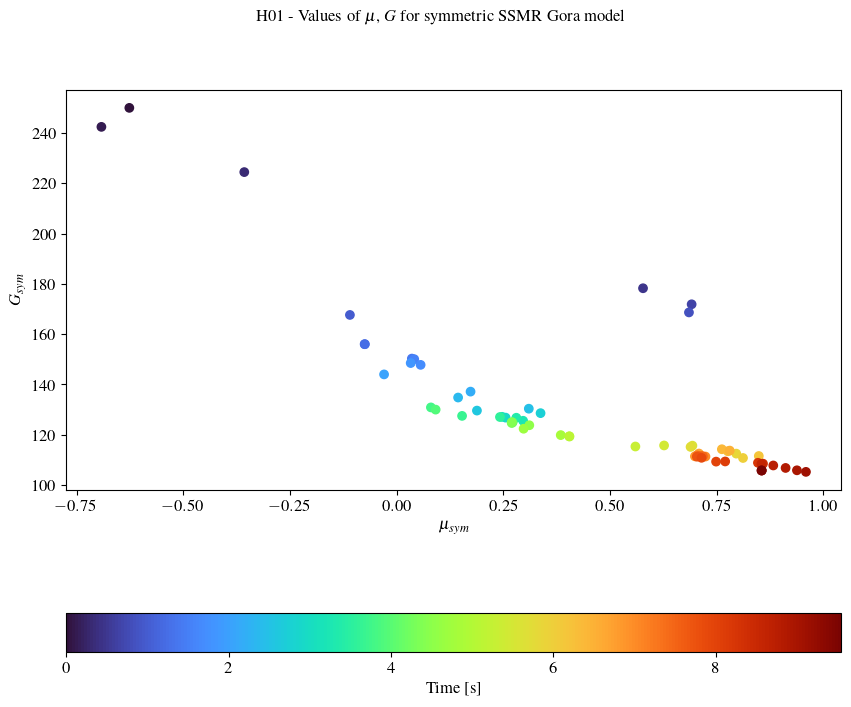

In [22]:
cm = plt.get_cmap("turbo")
cnorm = mpl.colors.Normalize(vmin=min(powdf.time_rel), vmax=max(powdf.time_rel))
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)

fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(powdf.m_sym, powdf.G_sym, c=scmap.to_rgba(powdf.time_rel))

ax.set_xlabel("${\mu}_{sym}$")
ax.set_ylabel("${G}_{sym}$")
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.2, ax=ax);
cb.ax.set_xlabel("Time [s]");

fig.suptitle(f"{abbr} - Values of $\mu$, $G$ for symmetric SSMR Gora model");

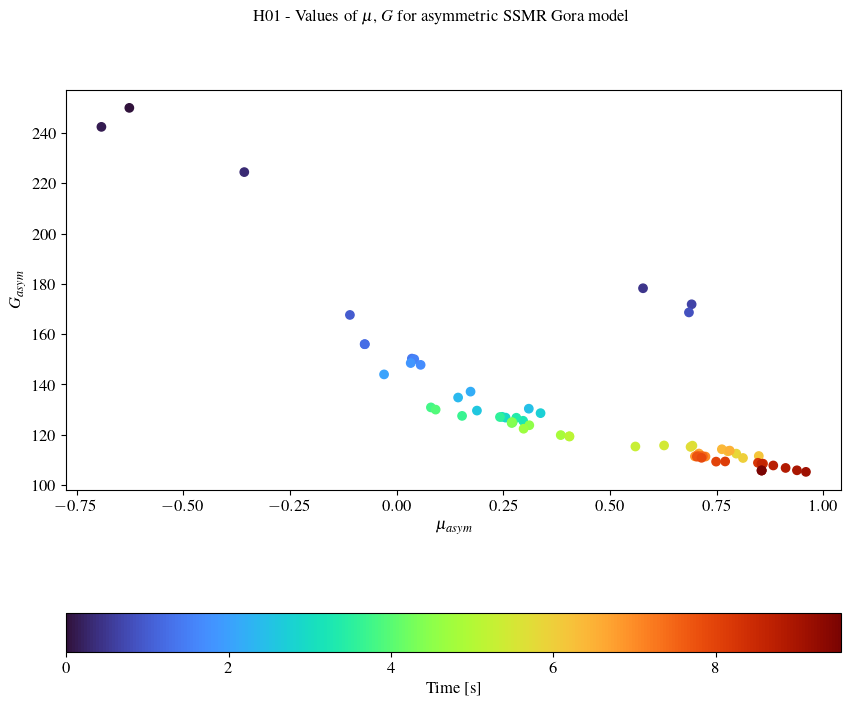

In [23]:
cm = plt.get_cmap("turbo")
cnorm = mpl.colors.Normalize(vmin=min(powdf.time_rel), vmax=max(powdf.time_rel))
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)

fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(powdf.m_asym, powdf.G_asym, c=scmap.to_rgba(powdf.time_rel))
ax.set_xlabel("${\mu}_{asym}$")
ax.set_ylabel("${G}_{asym}$")
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.2, ax=ax);
cb.ax.set_xlabel("Time [s]");

fig.suptitle(f"{abbr} - Values of $\mu$, $G$ for asymmetric SSMR Gora model");

## More figs

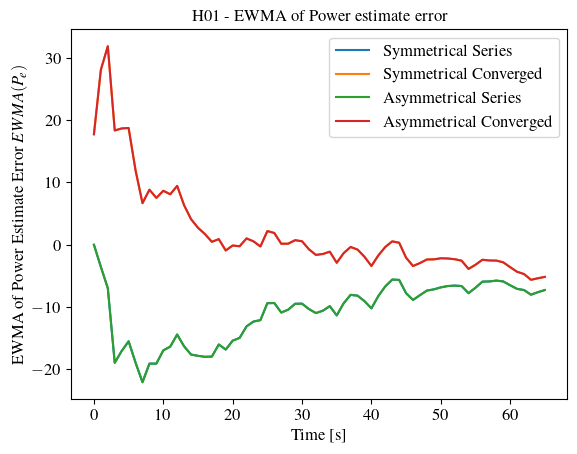

In [24]:
fig, ax = plt.subplots()
powdf.EWMAt_sym.plot(ax=ax, label="Symmetrical Series")
powdf.EWMAc_sym.plot(ax=ax, label="Symmetrical Converged")
powdf.EWMAt_asym.plot(ax=ax, label="Asymmetrical Series")
powdf.EWMAc_asym.plot(ax=ax, label="Asymmetrical Converged")
ax.legend()
ax.set_ylabel("EWMA of Power Estimate Error $EWMA(P_e)$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - EWMA of Power estimate error")
fig.savefig(figdir / f"{abbr}_PEWMA.jpg", bbox_inches="tight")

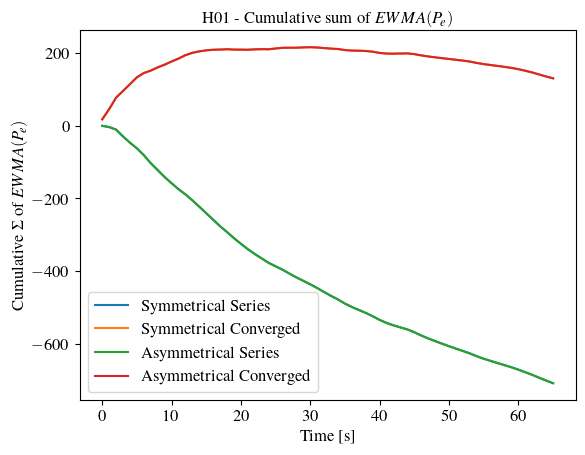

In [25]:
fig, ax = plt.subplots()
powdf.estt_sym.plot(ax=ax, label="Symmetrical Series")
powdf.estc_sym.plot(ax=ax, label="Symmetrical Converged")
powdf.estt_asym.plot(ax=ax, label="Asymmetrical Series")
powdf.estc_asym.plot(ax=ax, label="Asymmetrical Converged")
ax.legend()
ax.set_ylabel("Cumulative $\Sigma$ of $EWMA(P_e)$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - Cumulative sum of $EWMA(P_e)$")
fig.savefig(figdir / f"{abbr}_estimator.jpg", bbox_inches="tight")


Text(0.5, 0.01, 'Time [s]')

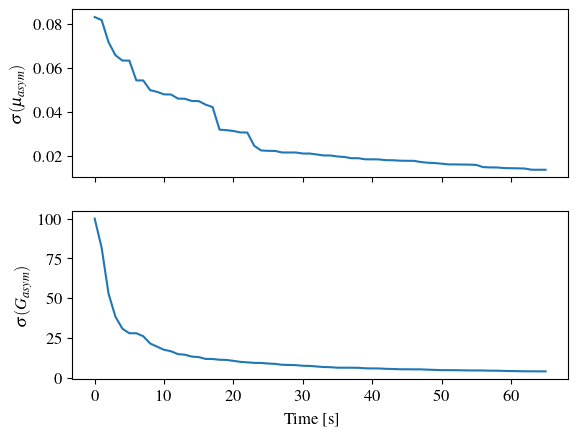

In [26]:
fig, (ax1, ax2) = plt.subplots(sharex=True, nrows=2)
powdf.sm_asym.plot(ax=ax1)
powdf.sG_asym.plot(ax=ax2)

ax1.set_ylabel("$\sigma({\mu}_{asym})$")
ax2.set_ylabel("$\sigma({G}_{asym})$")

fig.supxlabel("Time [s]")


Text(0.5, 0.01, 'Time [s]')

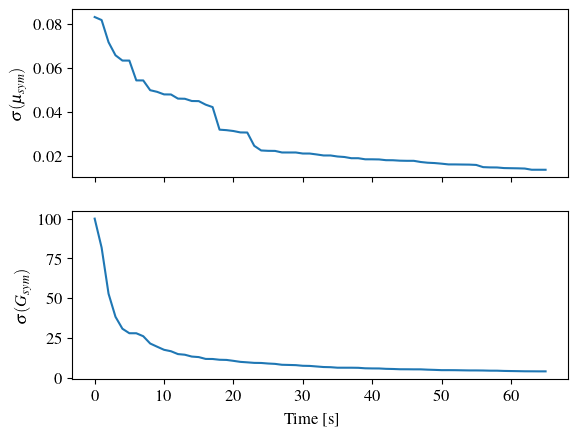

In [27]:
fig, (ax1, ax2) = plt.subplots(sharex=True, nrows=2)
powdf.sm_sym.plot(ax=ax1)
powdf.sG_sym.plot(ax=ax2)

ax1.set_ylabel("$\sigma({\mu}_{sym})$")
ax2.set_ylabel("$\sigma({G}_{sym})$")

fig.supxlabel("Time [s]")

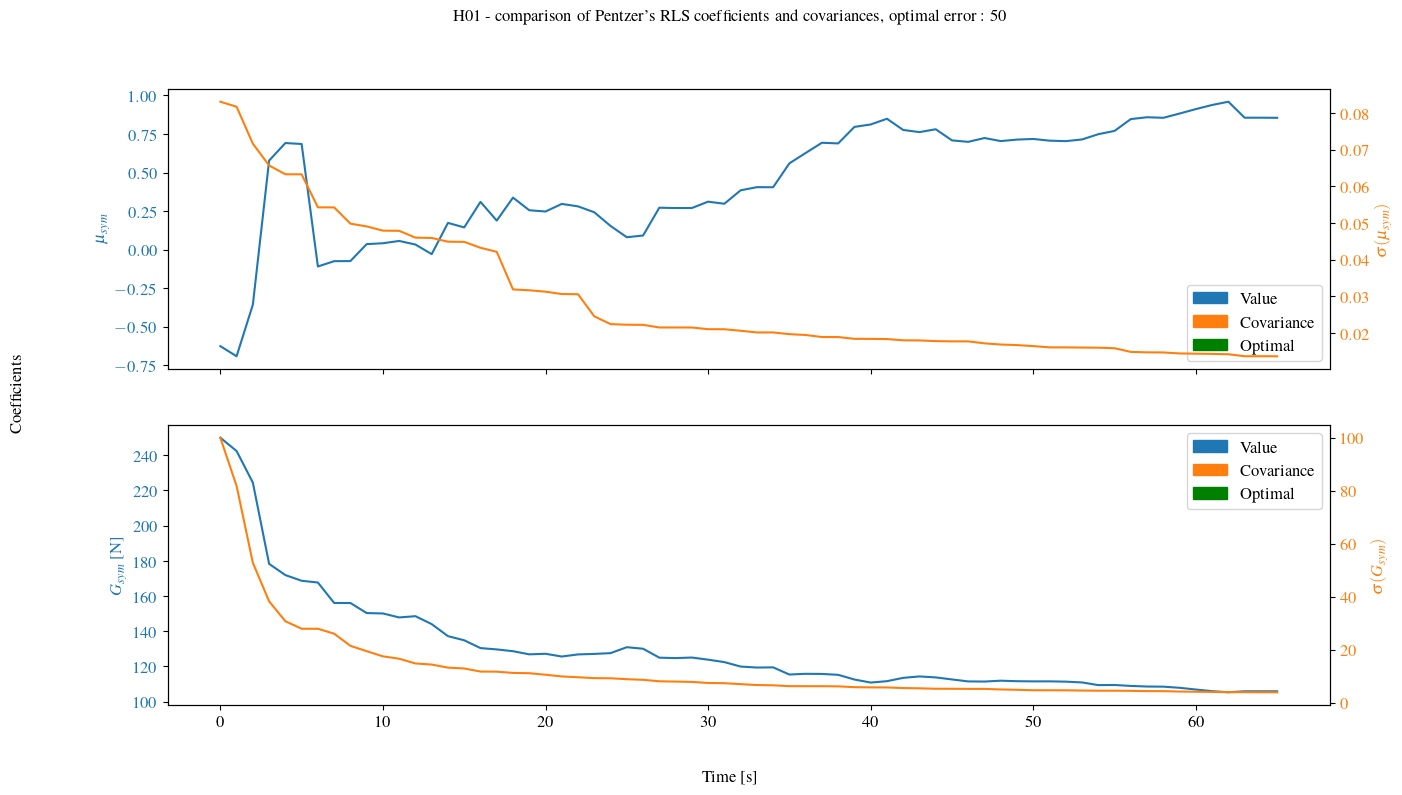

In [28]:
import matplotlib.patches as mpatches

fig_colors = {"C0": "Value", "C1": "Covariance", "g": "Optimal"}
legend_handles = [mpatches.Patch(color=col, label=lab) for col, lab in fig_colors.items()]

fig, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, figsize=(15, 8))
powdf.m_sym.plot(ax=ax1, label="Value", color="C0")
powdf.G_sym.plot(ax=ax2, label="Value", color="C0")

# ax1.axhline(y=optimal["mu"], color="g", linestyle="--", label="Optimal")
# ax2.axhline(y=optimal["G"], color="g", linestyle="--", label="Optimal")

ax1_twin = ax1.twinx()
ax2_twin = ax2.twinx()

powdf.sm_sym.plot(ax=ax1_twin, label="Covariance", color="C1")
powdf.sG_sym.plot(ax=ax2_twin, label="Covariance", color="C1")

ax1.set_ylabel("${\mu}_{sym}$", color="C0")
ax2.set_ylabel("$G_{sym}$ [N]", color="C0")

ax1_twin.set_ylabel("${\sigma}({\mu}_{sym})$", color="C1")
ax2_twin.set_ylabel("${\sigma}({G}_{sym})$", color="C1")

ax1.tick_params(axis='y', labelcolor="C0")
ax2.tick_params(axis='y', labelcolor="C0")

ax1_twin.tick_params(axis='y', labelcolor="C1")
ax2_twin.tick_params(axis='y', labelcolor="C1")

ax1.legend(handles=legend_handles)
ax2.legend(handles=legend_handles)

# ax1.set_title(f"Optimal value : {optimal['mu']}")
# ax2.set_title(f"Optimal value : {optimal['G']}")

fig.supylabel("Coefficients")
fig.supxlabel("Time [s]")

# optimal_err = optimal["err"]
optimal_err = 50
fig.suptitle(f"{abbr} - comparison of Pentzer's RLS coefficients and covariances, optimal error : ${optimal_err}$")

fig.savefig(figdir / f"{abbr}_covariance-coefficients.jpg", bbox_inches="tight")